In [1]:
#Libreria necesaria
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt

Una esfera de densidad $\rho_{e}$ y de radio $r$ está sumergida parcialmente en agua hasta una profundidad $d$, calcular dicha profundidad.

<img src="esferaflotando.png">

Para calcular el volumen del casquete esférico sumergido en el agua necesitamos resolver la siguiente integral:

$V_c=\int_{0}^{d}\pi(r^{2}-(r-y)^2)dy$

La cual se obtiene mediante la utilización del método de discos, donde $y$ es la distancia desde un disco de posición arbitraria hasta el extremo del casquete esférico, y $dy$ representa el ancho infinitesimal de dicho disco. 

Además, la fórmula $r^{2}-(r-y)^2$ obtenida mediante el uso del teorema de Pitágoras, nos permite calcular el radio al cuadrado del disco.
Al resolver la integral, se obtiene el siguiente volumen del casquete esférico sumergido en el agua:

$V_c=\frac{\pi d^{2}}{3}(3r-d)$

A través de lo anterior obtenemos el peso del agua como:

$W_a=g \rho_{a} \frac{\pi d^{2}}{3}(3r-d)$

Donde $\rho_a$ representa la densidad del fluido, en este caso agua.
Por otro lado, la masa de la esfera se puede calcular con la siguiente formula:

$m_e=\rho_{e} \frac{4\pi r^{3}}{3}$

Como la esfera se encuentra parcialmente sumergida en el agua, sobre la superficie de la misma actúan los efectos
de presión tanto del aire como del agua, dichos efectos aparecen en forma de fuerzas perpendiculares a su superficie.

Si se analiza la flotación de la esfera en el agua se obtiene que el empuje experimentado por la esfera tiene que ser igual al peso de la misma, ya que esta se encuentra en equilibrio. De esta forma se puede calcular el empuje con la siguiente fórmula:

$Em=m_{e} g= g \rho_{e}\frac{4\pi r^{3}}{3}$

Aplicando el principio de Arquímedes el cual establece que “Un cuerpo total o parcialmente sumergido en un fluido
en reposo experimenta un empuje vertical hacia arriba igual al peso del fluido desalojado”.

De esta forma igualando las ecuaciones de empuje vertical y el peso del agua desplazada, obtenemos la siguiente expresión:

$g \rho_{e}\frac{4\pi r^{3}}{3}=g \rho_{a} \frac{\pi d^{2}}{3}(3r-d)$

Igualando a cero la expresión anterior:

$\rho_a d^{3}-3r \rho_{a} d^{2}+4\rho_{e} r^{3}=0$

Se obtiene una ecuación no lineal de la forma $f(d)=0$, para continuar con la solución se van a considerar los siguientes datos:

Densidad del agua: $\rho_{a}=1g/cm^{3}$

radio de la esfera: $r=10cm$

Densidad de la esfera de madera: $\rho_{e}=0.638g/cm^{3}$

In [2]:
#Variable
d = sy.symbols('d')

#Datos
pa = 1
r = 10
pe = 0.638

#Definimos la función
def f(d):
    return (pa*d**3)-(3*r*pa*d**2)+(4*pe*r**3)

print('Función f(d) con los valores de los datos:')
display(f(d))

Función f(d) con los valores de los datos:


d**3 - 30*d**2 + 2552.0

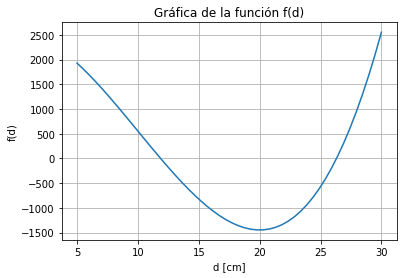

In [3]:
#Rango de valores de x
d = np.linspace(5, 30)

# La función f(d) se graficará en y
y = f(d)

#Ploteo
plt.plot(d, y)
plt.xlabel('d [cm]')
plt.ylabel('f(d)')
plt.title('Gráfica de la función f(d)')
plt.grid(True)
plt.show()

A través de la gráfica podemos ver que existen dos ceros de la función en el intervalo mostrado, tomando en consideración que la esfera está parcialmente sumergida, se va a calcular solo el valor de la raíz que está del lado izquierdo, y cuyo valor está en aproximádamente entre $d=11$ y $d=13$

In [18]:
#Definición de la función no lineal
def fd(d):
    return d**3-30*d**2+2552.0



#Definición de la derivada de la función no lineal
def dfd(d):
    return 3*d**2-60*d



def newton(fd, dfd, d0, tol=1e-10, maxiter=100):
    
#d0: Aproximación inicial
#tol: Tolerancia para la convergencia
#maxiter: Número máximo de iteraciones
#d: La aproximación de la raíz encontrada        
#iter: El número de iteraciones realizadas

    iter=0
    d=d0

    while iter < maxiter:
        f = fd(d)
        if abs(f) < tol:
            break

        df = dfd(d)
        if df == 0:
            print("La derivada es cero. No se puede continuar.")
            return None

        d = d-f/df
        iter += 1
        print(d)
    return d, iter


raiz, iteraciones = newton(fd, dfd, d0=11)
print("\nRaíz encontrada:", raiz)
print("\nIteraciones realizadas:", iteraciones)


11.851851851851851
11.861499719416388
11.861501508120353

Raíz encontrada: 11.861501508120353

Iteraciones realizadas: 3


In [6]:
print('Raíz evaluada en la función:')
fd(raiz)

Raíz evaluada en la función:


1.77351466845721e-11

In [7]:
tol=1e-10
if fd(raiz)<tol:
    print('Error menor a la tolerancia')
else:
    print('El error supera la tolerancia')

Error menor a la tolerancia
